In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
std=StandardScaler()

In [ ]:
Maharastra = { "Palghar" :  ["Mumbai","Thane","Nashik"],
              "Thane":["Palghar","Mumbai","Nashik","Ahmednagar","Pune","Raigad"],
              "Mumbai" :  ["Palghar","Raigad","Thane"],
              "Raigad": ["Mumbai","Thane","Pune","Ratnagiri"],
              "Ratnagiri" : ["Raigad","Satara","Sangli","Sindhudurg","Kolhapur"],
              "Sindhudurg" :  ["Ratnagiri","Kolhapur"],
              "Nashik": ["Dhule","Jalgaon","Aurangabad","Ahmednagar","Palghar","Thane"],
              "Ahmednagar": ["Nashik","Aurangabad","Beed","Solapur","Pune","Thane"],
              "Pune": ["Thane","Ahmednagar","Solapur","Satara","Raigad"],
              "Satara": ["Raigad","Pune","Solapur","Sangli","Ratnagiri"],
              "Sangli" :  ["Satara","Solapur","Kolhapur","Ratnagiri"],
              "Kolhapur": ["Ratnagiri","Sangli","Sindhudurg"],
              "Nandurbar":["Dhule"],
              "Dhule":["Nandurbar","Nashik","Jalgaon"],
              "Jalgaon":[ "Dhule","Nashik","Aurangabad","Buldhana","Jalna"],
              "Aurangabad":["Nashik","Jalgaon","Buldhana","Jalna","Beed","Ahmednagar"],
              "Jalna":["Aurangabad","Buldhana","Parbhani","Beed"],
              "Beed":["Ahmednagar","Aurangabad","Jalna","Parbhani","Latur","Osmanabad"],
              "Solapur":["Pune","Ahmednagar","Osmanabad","Satara","Sangli"],
              "Osmanabad":["Beed","Latur","Ahmednagar","Solapur"],
              "Latur":["Parbhani","Beed","Osmanabad","Nanded"],
              "Nanded":["Parbhani","Hingoli","Yavatmal"],
              "Parbhani":["Jalna","Beed","Latur","Nanded","Hingoli","Buldhana"],
              "Hingoli":["Parbhani","Nanded","Yavatmal","Washim","Buldhana"],
              "Buldhana":["Jalgaon","Jalna","Parbhani","Washim","Akola"],
              "Akola":["Buldhana","Washim","Amravati"],
              "Amravati":["Akola","Washim","Yavatmal","Wardha"],
              "Washim":["Buldhana","Akola", "Hingoli","Amravati","Yavatmal"],
              "Yavatmal":["Washim","Amravati","Wardha","Chandrapur","Hingoli","Nanded"],
              "Wardha":["Amravati","Yavatmal","Chandrapur","Nagpur"],
              "Nagpur":["Wardha","Chandrapur","Bhandara"],
              "Bhandara":["Nagpur","Gondia","Chandrapur"],
              "Gondia":["Bhandara","Chandrapur","Gadchiroli"],
              "Chandrapur":["Yavatmal","Wardha","Nagpur","Bhandara","Gondia","Gadchiroli"],
              "Gadchiroli":["Chandrapur","Gondia"]
}

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('SortedData1.csv')
df = df[df['State code = '] == 'MH']
df.head()
#df.info()

,Entry_ID,Date Announced,DetectedDistrict,Detected State,State code =,Reported Cases,Recovered,Deaths
441,587564,05/05/2021,Mumbai,Maharashtra,MH,3882.0,4093.0,77.0
442,587565,05/05/2021,Thane,Maharashtra,MH,3071.0,3794.0,77.0
443,587566,05/05/2021,Palghar,Maharashtra,MH,1786.0,1205.0,4.0
444,587567,05/05/2021,Raigad,Maharashtra,MH,1553.0,1488.0,32.0
445,587568,05/05/2021,Ratnagiri,Maharashtra,MH,939.0,773.0,8.0


In [ ]:
print(df.shape)
print(df.isnull().sum())
print(df.dtypes)

(454, 8)
Entry_ID            0
Date Announced      0
DetectedDistrict    0
Detected State      0
State code =        0
Reported Cases      0
Recovered           0
Deaths              0
dtype: int64
Entry_ID              int64
Date Announced       object
DetectedDistrict     object
Detected State       object
State code =         object
Reported Cases      float64
Recovered           float64
Deaths              float64
dtype: object


In [ ]:
df.drop(["Entry_ID"],1,inplace = True)

In [ ]:
df["Date Announced"] = pd.to_datetime(df["Date Announced"])
grouped_district = df.groupby(["DetectedDistrict"]).agg({"Reported Cases": 'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(['Reported Cases'],ascending = False)
grouped_district_neighbour = df.groupby(["DetectedDistrict"],as_index = False).agg({"Reported Cases": 'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(['Reported Cases'],ascending = False)

NameError: ignored

In [ ]:
#grouped_district.head(35)

In [ ]:
Total_reportedCases = grouped_district['Reported Cases'].sum()
Total_Recovered = grouped_district['Recovered'].sum()
Total_Deaths = grouped_district['Deaths'].sum()
print(Total_reportedCases,Total_Recovered,Total_Deaths)
print(df)

581442.0 767333.0 10754.0
      Date Announced DetectedDistrict  ... Recovered Deaths
441       2021-05-05           Mumbai  ...    4093.0   77.0
442       2021-05-05            Thane  ...    3794.0   77.0
443       2021-05-05          Palghar  ...    1205.0    4.0
444       2021-05-05           Raigad  ...    1488.0   32.0
445       2021-05-05        Ratnagiri  ...     773.0    8.0
...              ...              ...  ...       ...    ...
23186     2021-05-17           Wardha  ...     491.0    3.0
23187     2021-05-17         Bhandara  ...     697.0    0.0
23188     2021-05-17           Gondia  ...      66.0    2.0
23189     2021-05-17       Chandrapur  ...     594.0  134.0
23190     2021-05-17       Gadchiroli  ...     407.0    2.0

[454 rows x 7 columns]


In [ ]:
grouped_district.dtypes

Reported Cases    float64
Recovered         float64
Deaths            float64
dtype: object

In [ ]:
grouped_district["Dist_perc(Reported)"] = (grouped_district["Reported Cases"]/Total_reportedCases)*100
grouped_district["Dist_perc(Recovered)"] = (grouped_district["Recovered"]/Total_Recovered)*100
grouped_district["Dist_perc(Deaths)"] = (grouped_district["Deaths"]/Total_Deaths)*100

#for grouped_district_neighbour
grouped_district_neighbour["Dist_perc(Reported)"] = (grouped_district_neighbour["Reported Cases"]/Total_reportedCases)*100
grouped_district_neighbour["Dist_perc(Recovered)"] = (grouped_district_neighbour["Recovered"]/Total_Recovered)*100
grouped_district_neighbour["Dist_perc(Deaths)"] = (grouped_district_neighbour["Deaths"]/Total_Deaths)*100


In [ ]:
grouped_district.head()


,Reported Cases,Recovered,Deaths,Dist_perc(Reported),Dist_perc(Recovered),Dist_perc(Deaths)
DetectedDistrict,,,,,,
Pune,96136.0,128845.0,555.0,16.534065,16.791276,5.160870
Ahmednagar,41325.0,43760.0,295.0,7.107330,5.702870,2.743165
Nashik,40792.0,62137.0,833.0,7.015661,8.097788,7.745955
Nagpur,36592.0,56157.0,659.0,6.293319,7.318465,6.127952
Solapur,28666.0,27281.0,587.0,4.930156,3.555301,5.458434


**Neighbouring districts**

In [ ]:
dict_neigh_list = {}
for district in Maharastra:
  neighbour_cases = 0
  for neighbour in Maharastra[district]:
    try:
      neigh_dist = grouped_district_neighbour.loc[grouped_district_neighbour['DetectedDistrict'] == str(neighbour)]['Reported Cases'].values
    except:
      neigh_dist = 0
    neighbour_cases += float(neigh_dist)
  dict_neigh_list[district] = neighbour_cases
print(dict_neigh_list)

{'Palghar': 95150.0, 'Thane': 234336.0, 'Mumbai': 54667.0, 'Raigad': 160128.0, 'Ratnagiri': 85870.0, 'Sindhudurg': 29887.0, 'Nashik': 107606.0, 'Ahmednagar': 219469.0, 'Pune': 134819.0, 'Satara': 168998.0, 'Sangli': 83737.0, 'Kolhapur': 36894.0, 'Nandurbar': 3512.0, 'Dhule': 52829.0, 'Jalgaon': 81324.0, 'Aurangabad': 133385.0, 'Jalna': 52805.0, 'Beed': 85390.0, 'Solapur': 192257.0, 'Osmanabad': 95419.0, 'Latur': 36125.0, 'Nanded': 19696.0, 'Parbhani': 57512.0, 'Hingoli': 47197.0, 'Buldhana': 38572.0, 'Akola': 36903.0, 'Amravati': 32384.0, 'Washim': 49600.0, 'Yavatmal': 48327.0, 'Wardha': 73946.0, 'Nagpur': 27347.0, 'Bhandara': 55842.0, 'Gondia': 24058.0, 'Chandrapur': 68660.0, 'Gadchiroli': 19250.0}


In [ ]:
Neighbour_cases=[]
for value in grouped_district_neighbour['DetectedDistrict']:
  for dist in dict_neigh_list:
    if str(value) == str(dist):
      Neighbour_cases.append(dict_neigh_list[dist])

"""sum =0.0
for x in range(35):
  sum = sum + Neighbour_cases[x]
print(sum)"""
#print(Neighbour_cases)
grouped_district_neighbour["NeighbourCases"] = Neighbour_cases
grouped_district_neighbour.head()
grouped_district["Neighbourcases"] = Neighbour_cases



  

In [ ]:
grouped_district["Neigh_perc(Reported)"] = (grouped_district["Neighbourcases"]/Total_reportedCases
                                            )*100

**Adding population density to the dataframe  (Reported cases vs population density)**

In [ ]:
grouped_district.head()
population  = pd.read_csv('Population.csv')
population.drop(['Sex Ratio','Literacy Rate'],1,inplace=True)
population.head()

,District Name,Total,Population Density
0,Nandurbar,1648295,277
1,Dhule,2050862,285
2,Jalgaon,4229917,360
3,Buldhana,2586258,268
4,Akola,1813906,320


In [ ]:
Pop_density = population.set_index('District Name').to_dict()['Population Density']
District_Pop=[]
print(Pop_density['Palghar'])
for value in grouped_district_neighbour['DetectedDistrict']:
  for dist in Pop_density:
    if str(value) == str(dist):
      District_Pop.append(Pop_density[dist])


grouped_district['PopulationDensity'] = District_Pop
grouped_district.head()


102


,Reported Cases,Recovered,Deaths,Dist_perc(Reported),Dist_perc(Recovered),Dist_perc(Deaths),Neighbourcases,Neigh_perc(Reported),PopulationDensity
DetectedDistrict,,,,,,,,,
Pune,96136.0,128845.0,555.0,16.534065,16.791276,5.160870,134819.0,23.187007,603
Ahmednagar,41325.0,43760.0,295.0,7.107330,5.702870,2.743165,219469.0,37.745639,266
Nashik,40792.0,62137.0,833.0,7.015661,8.097788,7.745955,107606.0,18.506747,393
Nagpur,36592.0,56157.0,659.0,6.293319,7.318465,6.127952,27347.0,4.703307,470
Solapur,28666.0,27281.0,587.0,4.930156,3.555301,5.458434,192257.0,33.065551,290


In [ ]:
#new dataframe for clusterring based on District reported to the population density
df_clustering = grouped_district
df_clustering.head()
#df_clustering.drop(['Clusters'],1,inplace=True)

,Reported Cases,Recovered,Deaths,Dist_perc(Reported),Dist_perc(Recovered),Dist_perc(Deaths),Neighbourcases,Neigh_perc(Reported),PopulationDensity
DetectedDistrict,,,,,,,,,
Pune,96136.0,128845.0,555.0,16.534065,16.791276,5.160870,134819.0,23.187007,603
Ahmednagar,41325.0,43760.0,295.0,7.107330,5.702870,2.743165,219469.0,37.745639,266
Nashik,40792.0,62137.0,833.0,7.015661,8.097788,7.745955,107606.0,18.506747,393
Nagpur,36592.0,56157.0,659.0,6.293319,7.318465,6.127952,27347.0,4.703307,470
Solapur,28666.0,27281.0,587.0,4.930156,3.555301,5.458434,192257.0,33.065551,290


In [ ]:
X=df_clustering[["PopulationDensity","Dist_perc(Deaths)"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X) 

In [ ]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Elbow Method')

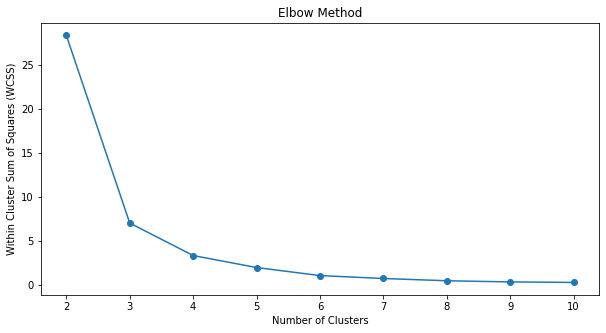

In [ ]:
x=np.arange(2,11)
plt.figure(figsize=(10,5))
plt.plot(x,wcss,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method")

In [ ]:
clf_final=KMeans(n_clusters=5,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [ ]:
df_clustering["Clusters"]=clf_final.predict(X)

In [ ]:
cluster_summary=pd.concat([df_clustering[df_clustering["Clusters"]==0].head(35),df_clustering[df_clustering["Clusters"]==1].head(35),df_clustering[df_clustering["Clusters"]==2].head(35),df_clustering[df_clustering["Clusters"]==3].head(35),df_clustering[df_clustering["Clusters"]==4].head(35)])
cluster_summary.style.background_gradient(cmap='Reds').format("{:.2f}")

,Reported Cases,Recovered,Deaths,Dist_perc(Reported),Dist_perc(Recovered),Dist_perc(Deaths),Neighbourcases,Neigh_perc(Reported),PopulationDensity,Clusters
DetectedDistrict,,,,,,,,,,
Ahmednagar,41325.00,43760.00,295.00,7.11,5.70,2.74,219469.00,37.75,266.00,0.00
Satara,25184.00,24549.00,246.00,4.33,3.20,2.29,168998.00,29.07,287.00,0.00
Kolhapur,20253.00,14682.00,378.00,3.48,1.91,3.51,36894.00,6.35,504.00,0.00
Palghar,15023.00,22115.00,221.00,2.58,2.88,2.06,95150.00,16.36,102.00,0.00
Chandrapur,14857.00,20874.00,378.00,2.56,2.72,3.51,68660.00,11.81,193.00,0.00
Raigad,13173.00,16838.00,271.00,2.27,2.19,2.52,160128.00,27.54,368.00,0.00
Amravati,12089.00,9360.00,235.00,2.08,1.22,2.19,32384.00,5.57,237.00,0.00
Aurangabad,11477.00,14665.00,252.00,1.97,1.91,2.34,133385.00,22.94,365.00,0.00
Yavatmal,10408.00,25534.00,318.00,1.79,3.33,2.96,48327.00,8.31,204.00,0.00


**From the above clustering we can see that Cluster 1 has the highest death percentage and very high propulation density**

---


**Followed by Cluster 2 with high death% and relatively low population density compared to cluster 1**

---

**CLuter 3 and 0 have low death percentage and population density compared to other clusters**

---

**Cluster 4 is a bit below cluster 2 regarding the population density and death percentage**

In [ ]:
Corona_prone = []
New_cluster= []
Corona_prone =  list(df_clustering[df_clustering["Clusters"]==1].index)
New_cluster =  list(df_clustering[df_clustering["Clusters"]==2].index)
Corona_prone = Corona_prone+New_cluster
print(Corona_prone)

['Mumbai', 'Nashik', 'Nagpur', 'Thane']


In [ ]:
Neigh_prone=[]
for i in Corona_prone:
  for district in Maharastra:
    if(i == district):
      Neigh_prone = Neigh_prone+Maharastra[district]
Neigh_prone = list(set(Neigh_prone))


for i in Corona_prone:
  for j in Neigh_prone:
    if(i==j):
      Neigh_prone.remove(i)
print(Neigh_prone)

['Pune', 'Palghar', 'Wardha', 'Jalgaon', 'Bhandara', 'Aurangabad', 'Dhule', 'Chandrapur', 'Raigad', 'Ahmednagar']


In [ ]:
print("THE MOST COVID PRONE DISTRICTS WHICH REQUIRE IMMEDIATE VACCINATION ATTENTION ARE\n")
for i in Corona_prone:
  print(i)
print("\nNEIGHBOURS WHICH ARE CLOSE TO COVID PRONE DISTRICT WHICH MIGHT GET AFFECTED ARE\n")
for i in Neigh_prone:
  print(i)

THE MOST COVID PRONE DISTRICTS WHICH REQUIRE IMMEDIATE VACCINATION ATTENTION ARE

Mumbai
Nashik
Nagpur
Thane

NEIGHBOURS WHICH ARE CLOSE TO COVID PRONE DISTRICT WHICH MIGHT GET AFFECTED ARE

Pune
Palghar
Wardha
Jalgaon
Bhandara
Aurangabad
Dhule
Chandrapur
Raigad
Ahmednagar
